In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('./policy_comparison.csv')
df1 = pd.read_csv('./policy_comparison1.csv')

df1.head()

,replacement,cache_policy,trace,ipc
0,lru,l3exclusive,bc-0.trace.gz,0.135735
1,lru,l3exclusive,bc-12.trace.gz,0.132027
2,lru,l3exclusive,bc-3.trace.gz,0.157031
3,lru,l3exclusive,bc-5.trace.gz,0.208691
4,lru,l3exclusive,bfs-10.trace.gz,0.262584


### IPC at different policies

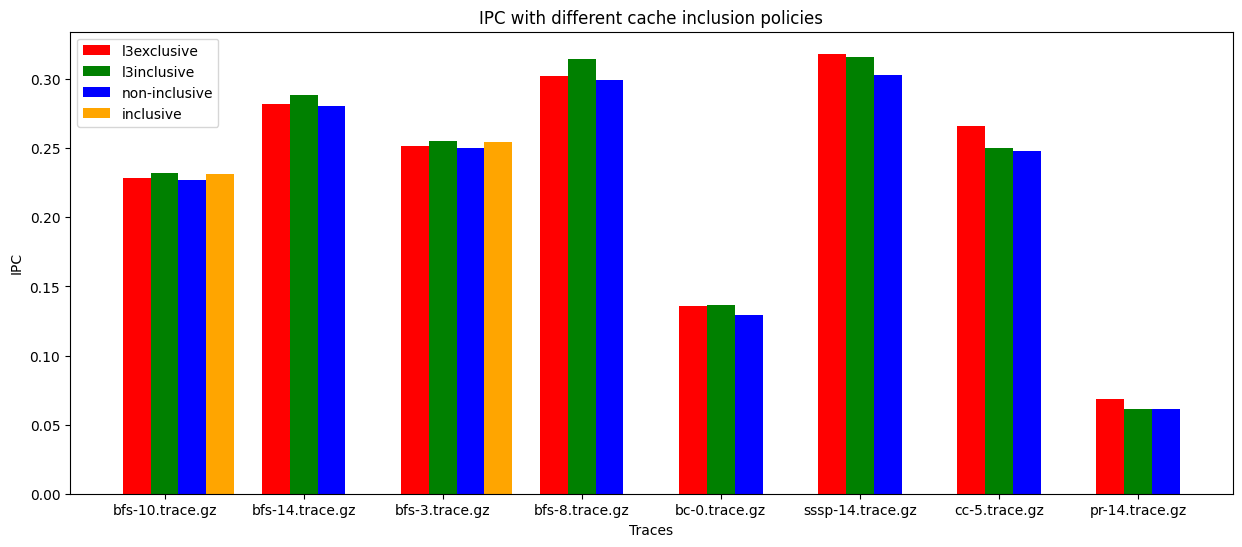

In [21]:
N = 8
ind = np.arange(N) 
width = 0.2
  
l3ex = []
l3inc = []
cache = []
inc = []
for i in range(len(df.index)):
    if df['policy'][i] == 'l3exclusive':
        l3ex.append(df['ipc'][i])
    elif df['policy'][i] == 'l3inclusive':
        l3inc.append(df['ipc'][i])
    elif df['policy'][i] == 'cache':
        cache.append(df['ipc'][i])
    else:
        inc.append(df['ipc'][i])

plt.figure(figsize=(15,6))
bar1 = plt.bar(ind, l3ex, width, color = 'r')
bar2 = plt.bar(ind+width, l3inc, width, color='g')
bar3 = plt.bar(ind+width*2, cache, width, color = 'b')
bar4 = plt.bar(ind+width*3, inc, width, color = 'orange')
  
plt.xlabel("Traces")
plt.ylabel('IPC')
plt.title("IPC with different cache inclusion policies")

plt.xticks(ind+width,df['trace'].unique())
plt.legend( (bar1, bar2, bar3, bar4), ('l3exclusive', 'l3inclusive', 'non-inclusive', 'inclusive') )
plt.savefig("ipc_policyComparison.jpg")
plt.show()

### Speed Up

Speed Up = $\frac{IPC_{new}}{IPC_{baseline}}$ , assuming baseline as (bimodal, no prefetcher, LRU, non-inclusive)

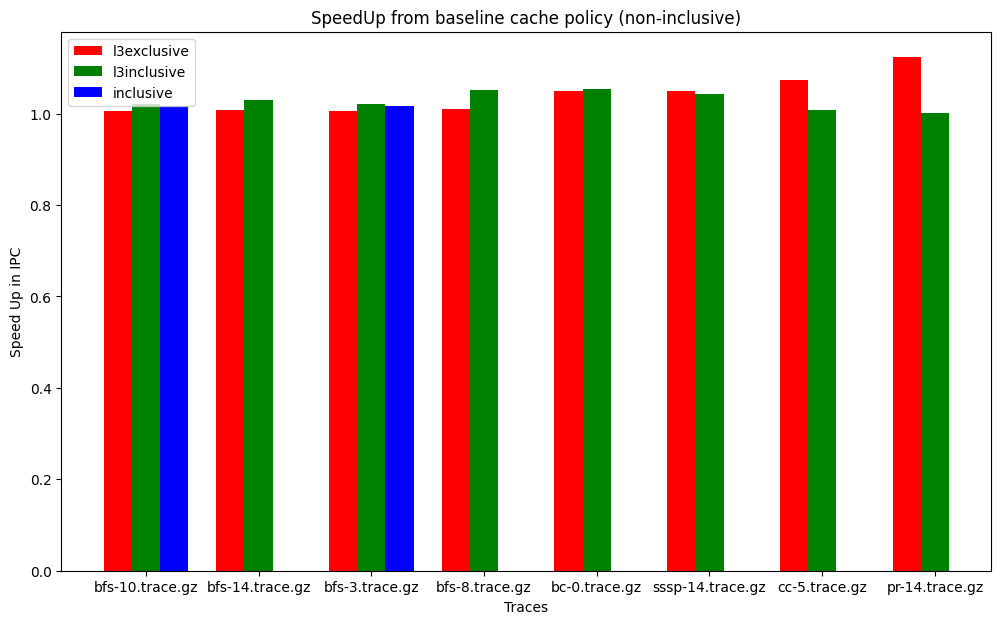

In [22]:
width = 0.25

l3ex = []
l3inc = []
cache = []
inc = []
for i in range(len(df.index)):
    if df['policy'][i] == 'l3exclusive':
        l3ex.append(df['ipc'][i])
    elif df['policy'][i] == 'l3inclusive':
        l3inc.append(df['ipc'][i])
    elif df['policy'][i] == 'cache':
        cache.append(df['ipc'][i])
    else:
        inc.append(df['ipc'][i])

for i in range(N):
    l3ex[i] = ((l3ex[i])/cache[i]) 
    l3inc[i] = ((l3inc[i])/cache[i]) 
    inc[i] = ((inc[i])/cache[i]) 

plt.figure(figsize=(12,7))
bar1 = plt.bar(ind, l3ex, width, color = 'r')
bar2 = plt.bar(ind+width, l3inc, width, color='g')
bar3 = plt.bar(ind+width*2, inc, width, color = 'b')
  
plt.xlabel("Traces")
plt.ylabel('Speed Up in IPC')
plt.title("SpeedUp from baseline cache policy (non-inclusive)")

plt.xticks(ind+width,df['trace'].unique())
plt.legend( (bar1, bar2, bar3), ('l3exclusive', 'l3inclusive', 'inclusive') )
plt.savefig("speedUp_policyComparison.jpg")
plt.show()

### Percentage Improvement

Improvement = $\frac{IPC_{new} - IPC_{baseline}}{IPC_{baseline}} * 100$ 

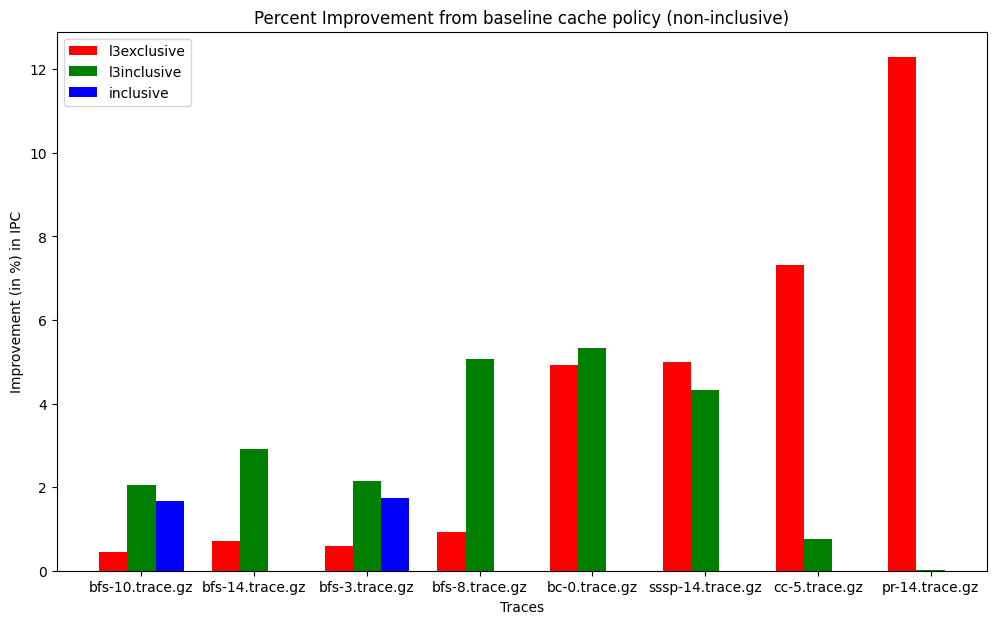

In [23]:
width = 0.25

l3ex = []
l3inc = []
cache = []
inc = []
for i in range(len(df.index)):
    if df['policy'][i] == 'l3exclusive':
        l3ex.append(df['ipc'][i])
    elif df['policy'][i] == 'l3inclusive':
        l3inc.append(df['ipc'][i])
    elif df['policy'][i] == 'cache':
        cache.append(df['ipc'][i])
    else:
        inc.append(df['ipc'][i])

for i in range(N):
    l3ex[i] = ((l3ex[i] - cache[i])/cache[i]) * 100
    l3inc[i] = ((l3inc[i] - cache[i])/cache[i]) * 100
    inc[i] = ((inc[i] - cache[i])/cache[i]) * 100

plt.figure(figsize=(12,7))
bar1 = plt.bar(ind, l3ex, width, color = 'r')
bar2 = plt.bar(ind+width, l3inc, width, color='g')
bar3 = plt.bar(ind+width*2, inc, width, color = 'b')
  
plt.xlabel("Traces")
plt.ylabel('Improvement (in %) in IPC')
plt.title("Percent Improvement from baseline cache policy (non-inclusive)")

plt.xticks(ind+width,df['trace'].unique())
plt.legend( (bar1, bar2, bar3), ('l3exclusive', 'l3inclusive', 'inclusive') )
plt.savefig("improvement_policyComparison.jpg")
plt.show()

In [9]:
df1.head()

,replacement,cache_policy,trace,ipc
0,lru,l3exclusive,bc-0.trace.gz,0.135735
1,lru,l3exclusive,bc-12.trace.gz,0.132027
2,lru,l3exclusive,bc-3.trace.gz,0.157031
3,lru,l3exclusive,bc-5.trace.gz,0.208691
4,lru,l3exclusive,bfs-10.trace.gz,0.262584


In [46]:
print(df1['replacement'].unique())
df1.drop_duplicates(keep=False, inplace=True)

['lru' 'srrip' 'ship' 'drrip']


In [47]:
df2 = df1.groupby('trace')
pp = df2.get_group('bfs-14.trace.gz')
pp = pp.sort_values(by = 'replacement')
l3ex =  pp.loc[pp['cache_policy'] == 'l3exclusive']['ipc'].tolist()
print(l3ex)

[0.280223, 0.280197, 0.280481, 0.280031]


bc-0.trace.gz [0.12412, 0.135735, 0.124115, 0.124101] [0.145474, 0.136229, 0.147722, 0.140582] [0.13361, 0.129421, 0.136014]
bc-12.trace.gz [0.120308, 0.132027, 0.120315, 0.120331] [0.141638, 0.131579, 0.142016, 0.136116] [0.129129, 0.125778, 0.132286]
bc-3.trace.gz [0.144743, 0.157031, 0.144689, 0.144784] [0.162826, 0.155687, 0.166678, 0.15969] [0.154307, 0.150652, 0.156823]
bc-5.trace.gz [0.192108, 0.208691, 0.192088, 0.192161] [0.225496, 0.213052, 0.222387, 0.218662] [0.208755, 0.20187, 0.211203]
bfs-10.trace.gz [0.262689, 0.262584, 0.262726, 0.262587] [0.267809, 0.26662, 0.273746, 0.267616] [0.262281, 0.261441, 0.267139]


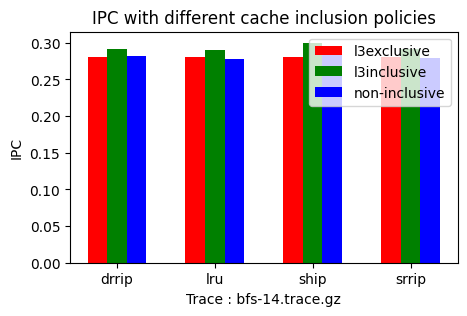

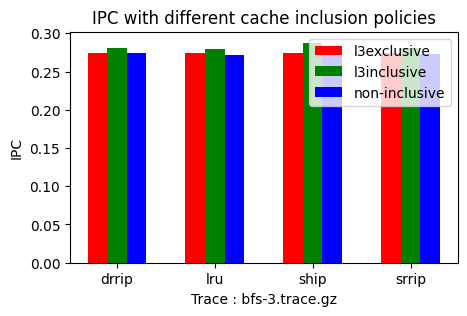

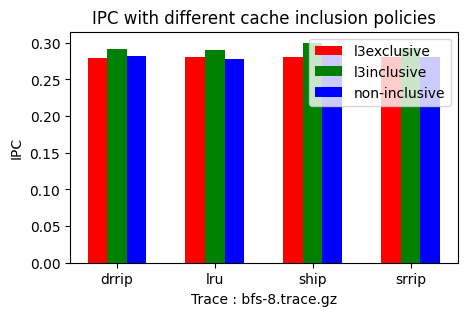

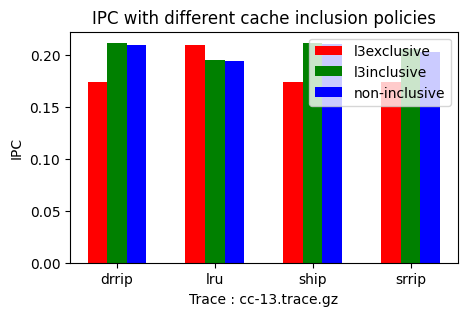

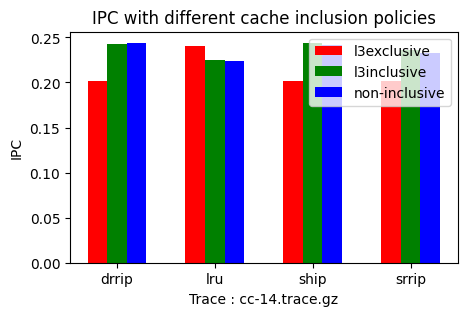

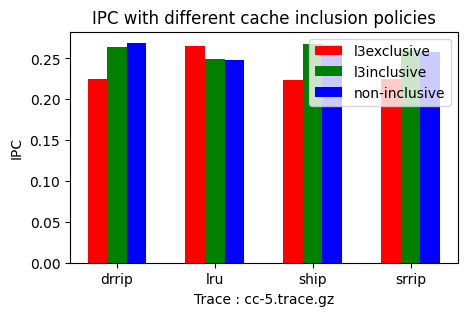

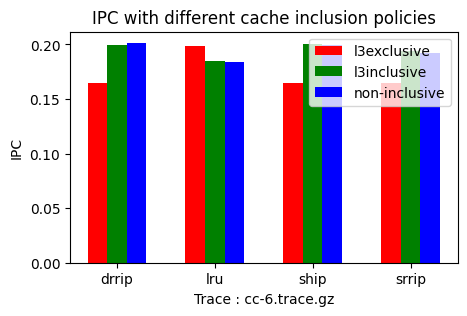

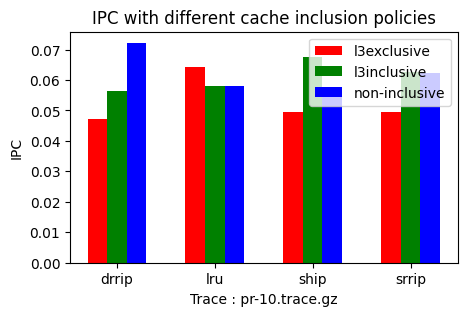

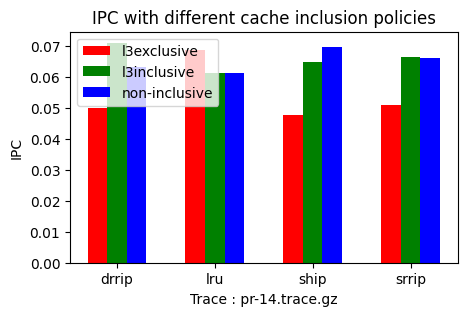

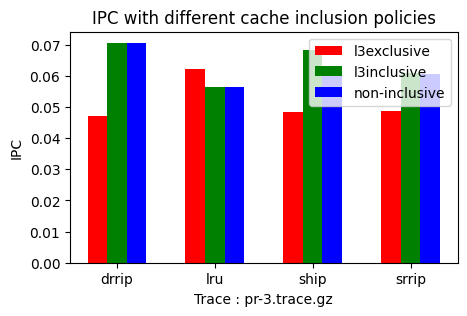

pr-5.trace.gz [0.0495701, 0.0647027, 0.0509073, 0.0495791] [0.0696446, 0.0702116, 0.0582108, 0.066289, 0.0629574] [0.0721502, 0.0582008, 0.0642527, 0.0627669]


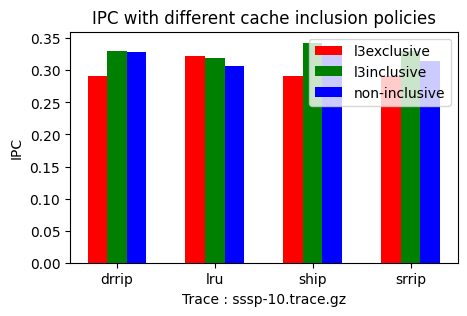

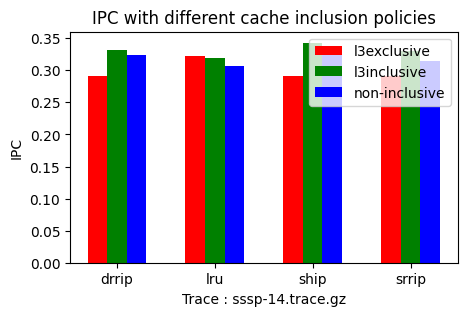

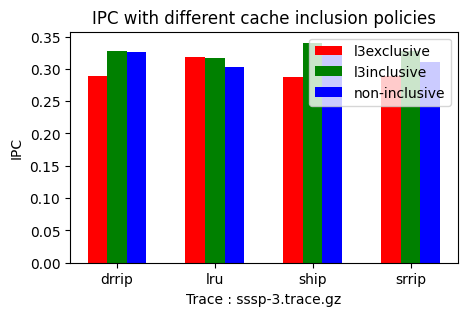

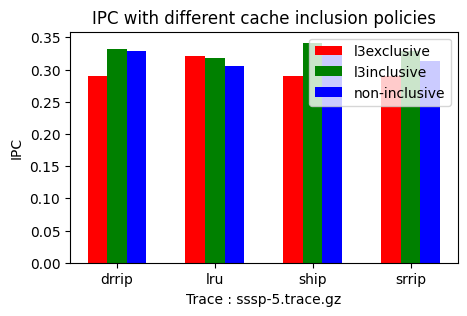

In [53]:
width = 0.2

for j in df1['trace'].unique():
    new_df = df2.get_group(j)
    new_df = new_df.sort_values(by = 'replacement')
    l3ex =  new_df.loc[new_df['cache_policy'] == 'l3exclusive']['ipc'].tolist()
    l3inc = new_df.loc[new_df['cache_policy'] == 'l3inclusive']['ipc'].tolist()
    cache = new_df.loc[new_df['cache_policy'] == 'cache']['ipc'].tolist()
    # inc = new_df.loc[new_df['cache_policy'] == 'inclusive']['ipc'].tolist()
    if len(l3ex) != len(l3inc) or len(l3ex) != len(cache) or len(l3inc) != len(cache):
        print(j, l3ex, l3inc, cache)
        continue 

    plt.figure(figsize=(5,3))
    N = len(l3ex)
    ind = np.arange(N) 
    bar1 = plt.bar(ind, l3ex, width, color = 'r')
    bar2 = plt.bar(ind+width, l3inc, width, color='g')
    bar3 = plt.bar(ind+width*2, cache, width, color = 'b')
    #bar4 = plt.bar(ind+width*3, inc[:5], width, color = 'orange')
    
    plt.xlabel(f"Trace : {j}")
    plt.ylabel('IPC')
    plt.title("IPC with different cache inclusion policies")
    plt.xticks(ind+width,new_df['replacement'].unique())
    plt.legend( (bar1, bar2, bar3), ('l3exclusive', 'l3inclusive', 'non-inclusive') )
    plt.show()
    # plt.savefig("ipc_policyComparison.jpg")